In [1]:
"""
  GNU GPL v3 License
 
  Copyright 2018 Niccolo` Tubini
 
  This program is free software: you can redistribute it and/or modify
  it under the terms of the GNU General Public License as published by
  the Free Software Foundation, either version 3 of the License, or
  (at your option) any later version.
 
  This program is distributed in the hope that it will be useful,
  but WITHOUT ANY WARRANTY; without even the implied warranty of
  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
  GNU General Public License for more details.
 
  You should have received a copy of the GNU General Public License
  along with this program.  If not, see <http://www.gnu.org/licenses/>.
"""

"""
Created on Tue Apr 17 14:52:22 2018

@author: Niccolo` Tubini

This code was obtained modifing the code pres_temp_4D_rd.py 
by Jeff Whitaker <jeffrey.s.whitaker@noaa.gov> 20070202
https://www.unidata.ucar.edu/software/netcdf/examples/programs/

This code allows to read a NetCDF and plot simulations results with animated
plot
"""

#from netCDF4_classic import Dataset
from netCDF4 import Dataset


import os

## pandas
import pandas as pd

## numpy
import numpy as np

## plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib.transforms as transforms
import matplotlib.ticker as mtick

## to convert unix time to human readable date
import time
import datetime

# Richards 1D: input

Needed to plot layers limits in water content plots

In [2]:
os.chdir("C:/Users/Niccolo/OMS/OMS_Project_Richards1D/data/RichardMeshGen_input")
os.listdir()

['Casulli2010_test2.csv',
 'Casulli2010_test2VG.csv',
 'ClaySand_noPonding.csv',
 'ClaySand_noPonding.PNG',
 'Clay_noPonding.csv',
 'Clay_noPonding.PNG',
 'Clay_noPondingBC.csv',
 'Clay_noPonding_Dry.csv',
 'SandClay_01Ponding_Measurement.csv',
 'SandClay_01Ponding_Measurement.PNG',
 'SandClay_noPonding.csv',
 'Sand_01Ponding.csv',
 'Sand_01Ponding.PNG']

In [3]:
data = pd.read_csv("Clay_noPonding_Dry.csv")

# Richards 1D: outputs

In [4]:
os.chdir("C:/Users/Niccolo/OMS/OMS_Project_Richards1D/output")
os.listdir()

['Casulli2010_test2VG_noRain_bottomDirichlet_300s.nc',
 'Casulli2010_test2_noRain_bottomDirichlet_100s.nc',
 'Casulli2010_test2_noRain_bottomDirichlet_100s_max.nc',
 'Casulli2010_test2_noRain_bottomDirichlet_300s.nc',
 'ClaySand_noPonding_TrentoRain_BottomDirichlet.nc',
 'Clay_01Ponding_noRain_BottomDirichlet.nc',
 'Clay_noPonding_2mmRain_BottomImpervious.nc',
 'Clay_noPonding_4mmRain_BottomImpervious.nc',
 'Clay_noPonding_Dry_2mmRain_bottomDirichlet0m.nc',
 'Clay_noPonding_noRain_05BottomDirichlet.nc',
 'Clay_noPonding_noRain_2mmBottomNeumann.nc',
 'Clay_noPonding_noRain_BottomDirichlet.nc',
 'Integrate PDE',
 'SandClay_noPonding_TrentoRain_BottomDirichlet.nc',
 'Sand_01Ponding_noRain_BottomDirichlet.nc',
 'Sand_01Ponding_noRain_BottomFreeDrainage.nc']

In [5]:
##########
##########

# open netCDF file for reading.
ncfile = Dataset('Clay_noPonding_Dry_2mmRain_bottomDirichlet0m.nc','r') 
print ('*** SUCCESS reading')

print('\n ***FILE INFO:\n')
print(ncfile)

## other usefull commands:
#print (ncfile.dimensions['time'])
#print (ncfile.file_format)
#print (ncfile.dimensions.keys())
print (ncfile.variables.keys())
#print (ncfile.variables['psi'])


depths = ncfile.variables['depth']
print('\n ***DEPTHS INFO:\n')
print(depths)

dualDepths = ncfile.variables['dual_depth']
print('\n ***DUAL DEPTH INFO:\n')
print(dualDepths)

time = ncfile.variables['time']
print('\n ***TIME INFO:\n')
print(time)

psi = ncfile.variables['psi']
print('\n ***PSI INFO:\n')
print(psi)

theta = ncfile.variables['water_heigth']
print('\n ***THETA INFO:\n')
print(theta)

iC = ncfile.variables['psiIC']
print('\n ***INITIAL CONDITION INFO:\n')
print(iC)

velocities = ncfile.variables['velocities']
print('\n ***VELOCITIES INFO:\n')
print(velocities)

error = ncfile.variables['error']
print('\n ***ERROR INFO:\n')
print(error)

topBC = ncfile.variables['topBC']
print('\n ***topBC INFO:\n')
print(topBC)

bottomBC = ncfile.variables['bottomBC']
print('\n ***bottomBC INFO:\n')
print(bottomBC)




*** SUCCESS reading

 ***FILE INFO:

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Description_of_the_problem: 1 layer clay Horton runoff 
 Grid input file: C:\Users\Niccolo\OMS\OMS_Project_Richards1D//data/Grid_NEtCDF/Clay_noPonding_Dry.nc 
 TopBC input file: C:\Users\Niccolo\OMS\OMS_Project_Richards1D//data/Timeseries/TestAll_4.csv 
 BottomBC input file: C:\Users\Niccolo\OMS\OMS_Project_Richards1D//data/Timeseries/TestAll_0.csv, timeDelta = 10, interface k: mean
    dimensions(sizes): depth(321), dualDepth(321), time(577)
    variables(dimensions): float64 depth(depth), float64 dual_depth(dualDepth), int32 time(time), float64 psi(time,depth), float64 psiIC(depth), float64 water_heigth(time,depth), float64 velocities(time,dualDepth), float64 error(time), float64 topBC(time), float64 bottomBC(time)
    groups: 

odict_keys(['depth', 'dual_depth', 'time', 'psi', 'psiIC', 'water_heigth', 'velocities', 'error', 'topBC', 'bottomBC'])



Qui si possono leggere tutti gli attributi del file: una descrizione generale dei risultati e poi alcune utili informazioni sulle variabili e coordinate che sono state salvate.

la variabile water_heigth contiene i theta per le celle del suolo e total water depth per la superficie, e` un po' ambigua come nomencletura

##### create a vector of date in human readable formatting and two dataframe for boundary conditions

In [6]:
## creates a vector with human readable dates
dates = [datetime.datetime.fromtimestamp(t).strftime("%Y-%m-%d %H:%M") for t in time[:]]

## create a dataframe for boundary condition timeseries, this will simplify plotting
topBC_DF = pd.DataFrame(np.column_stack([dates, topBC]), 
                               columns=['Dates', 'topBC'])
topBC_DF.topBC=topBC_DF.topBC.astype(float)

topBC_DF=topBC_DF.set_index("Dates")


bottomBC_DF = pd.DataFrame(np.column_stack([dates, bottomBC]), 
                               columns=['Dates', 'bottomBC'])
bottomBC_DF.bottomBC=bottomBC_DF.bottomBC.astype(float)

bottomBC_DF=bottomBC_DF.set_index("Dates")

# Set some plot features

In [7]:
labelSize = 18
titleSize = 22
legendSize = 14
axisTicksSize = 14

lineWidth = 3
lineStyle =''

markerSize = 3
markerType = 'o'

figureSizeHeigth = 10
figureSizeWidth = 10
figureSizeHeigth1 = 10
figureSizeWidth1 = 20

# Animated plots

## Water head

<IPython.core.display.Javascript object>


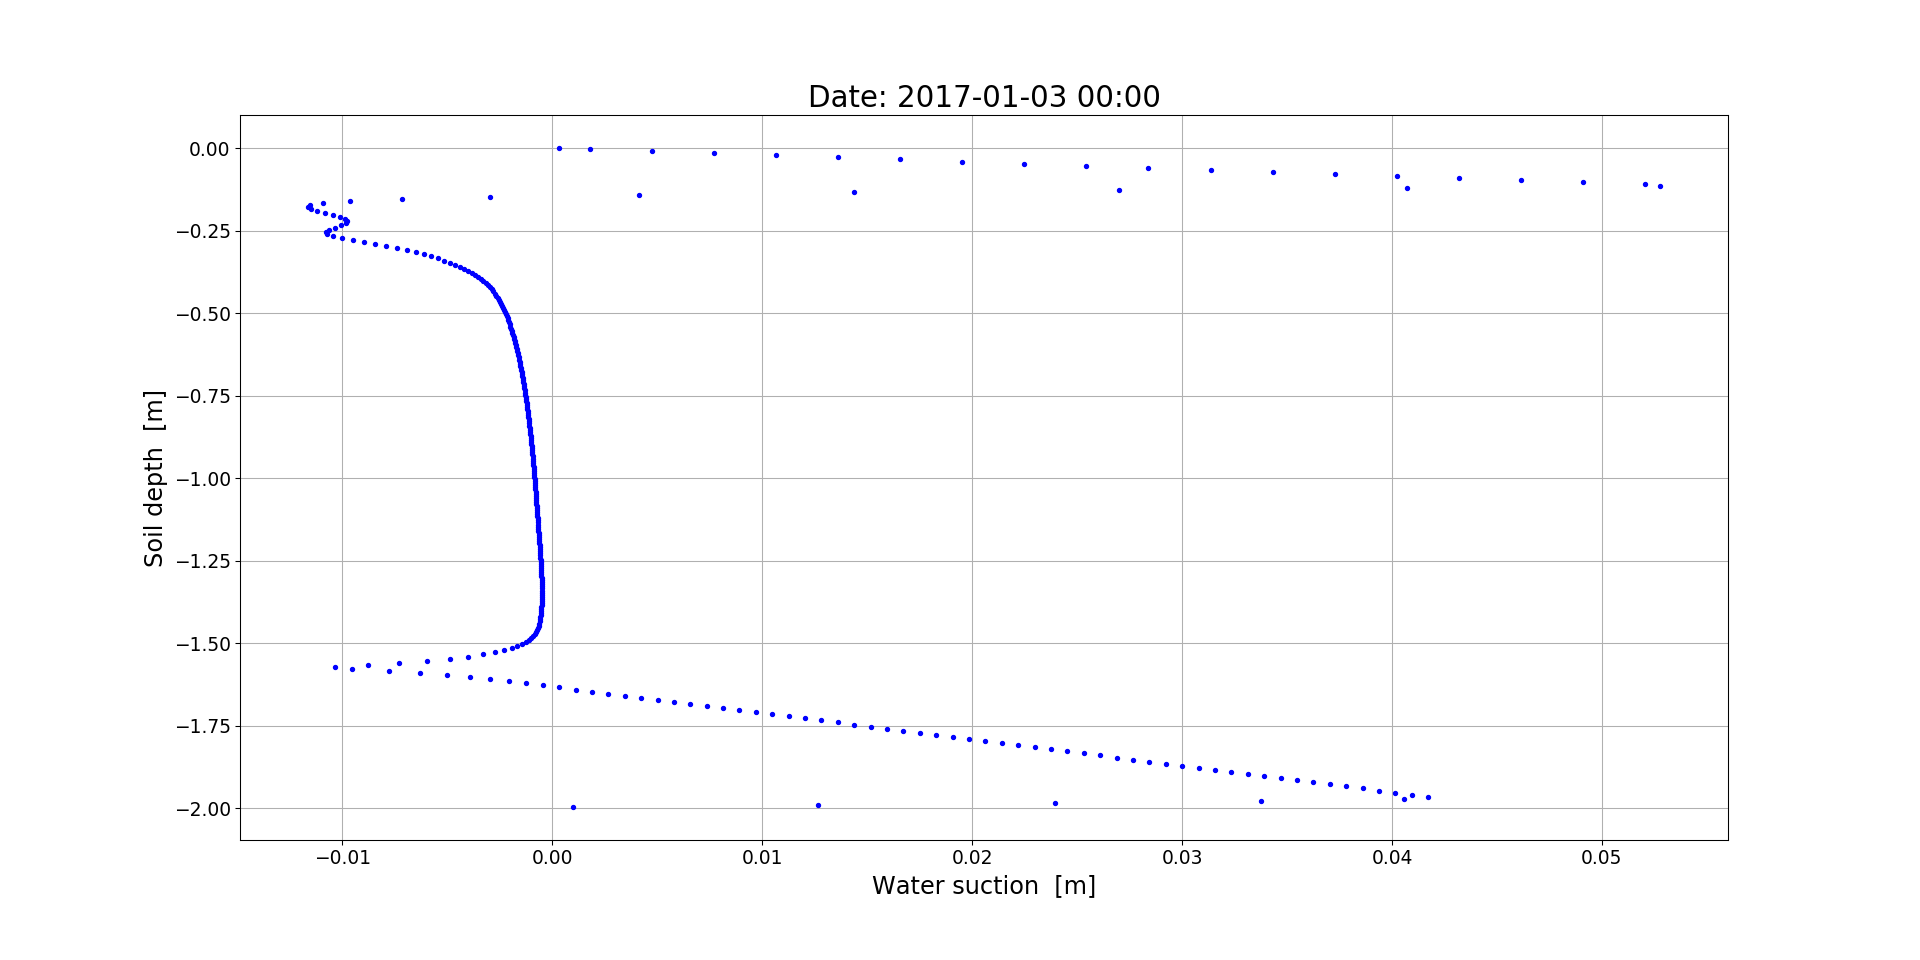

In [8]:
##https://stackoverflow.com/questions/39658717/plot-dynamically-changing-graph-using-matplotlib-in-jupyter-notebook
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(figureSizeWidth*2,figureSizeHeigth))
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,np.size(time[:]),6):
    date = datetime.datetime.fromtimestamp(time[i])
    ax.clear()
    ax.plot(psi[i,:], depths[:],linewidth=lineWidth,linestyle=lineStyle, marker=markerType, markersize=markerSize, color='b')
    # convert time value in a human readable date to title the plot
    ax.set_title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
    # use variable attributes to label axis
    ax.set_xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=labelSize)
    #ax.set_xlim(np.min(psi[:])*1.1,np.max(psi[:])*1.1)
    ax.set_ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
    plt.setp(ax.get_xticklabels(), visible=True)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
    ax.grid()
    
    fig.canvas.draw()

<IPython.core.display.Javascript object>


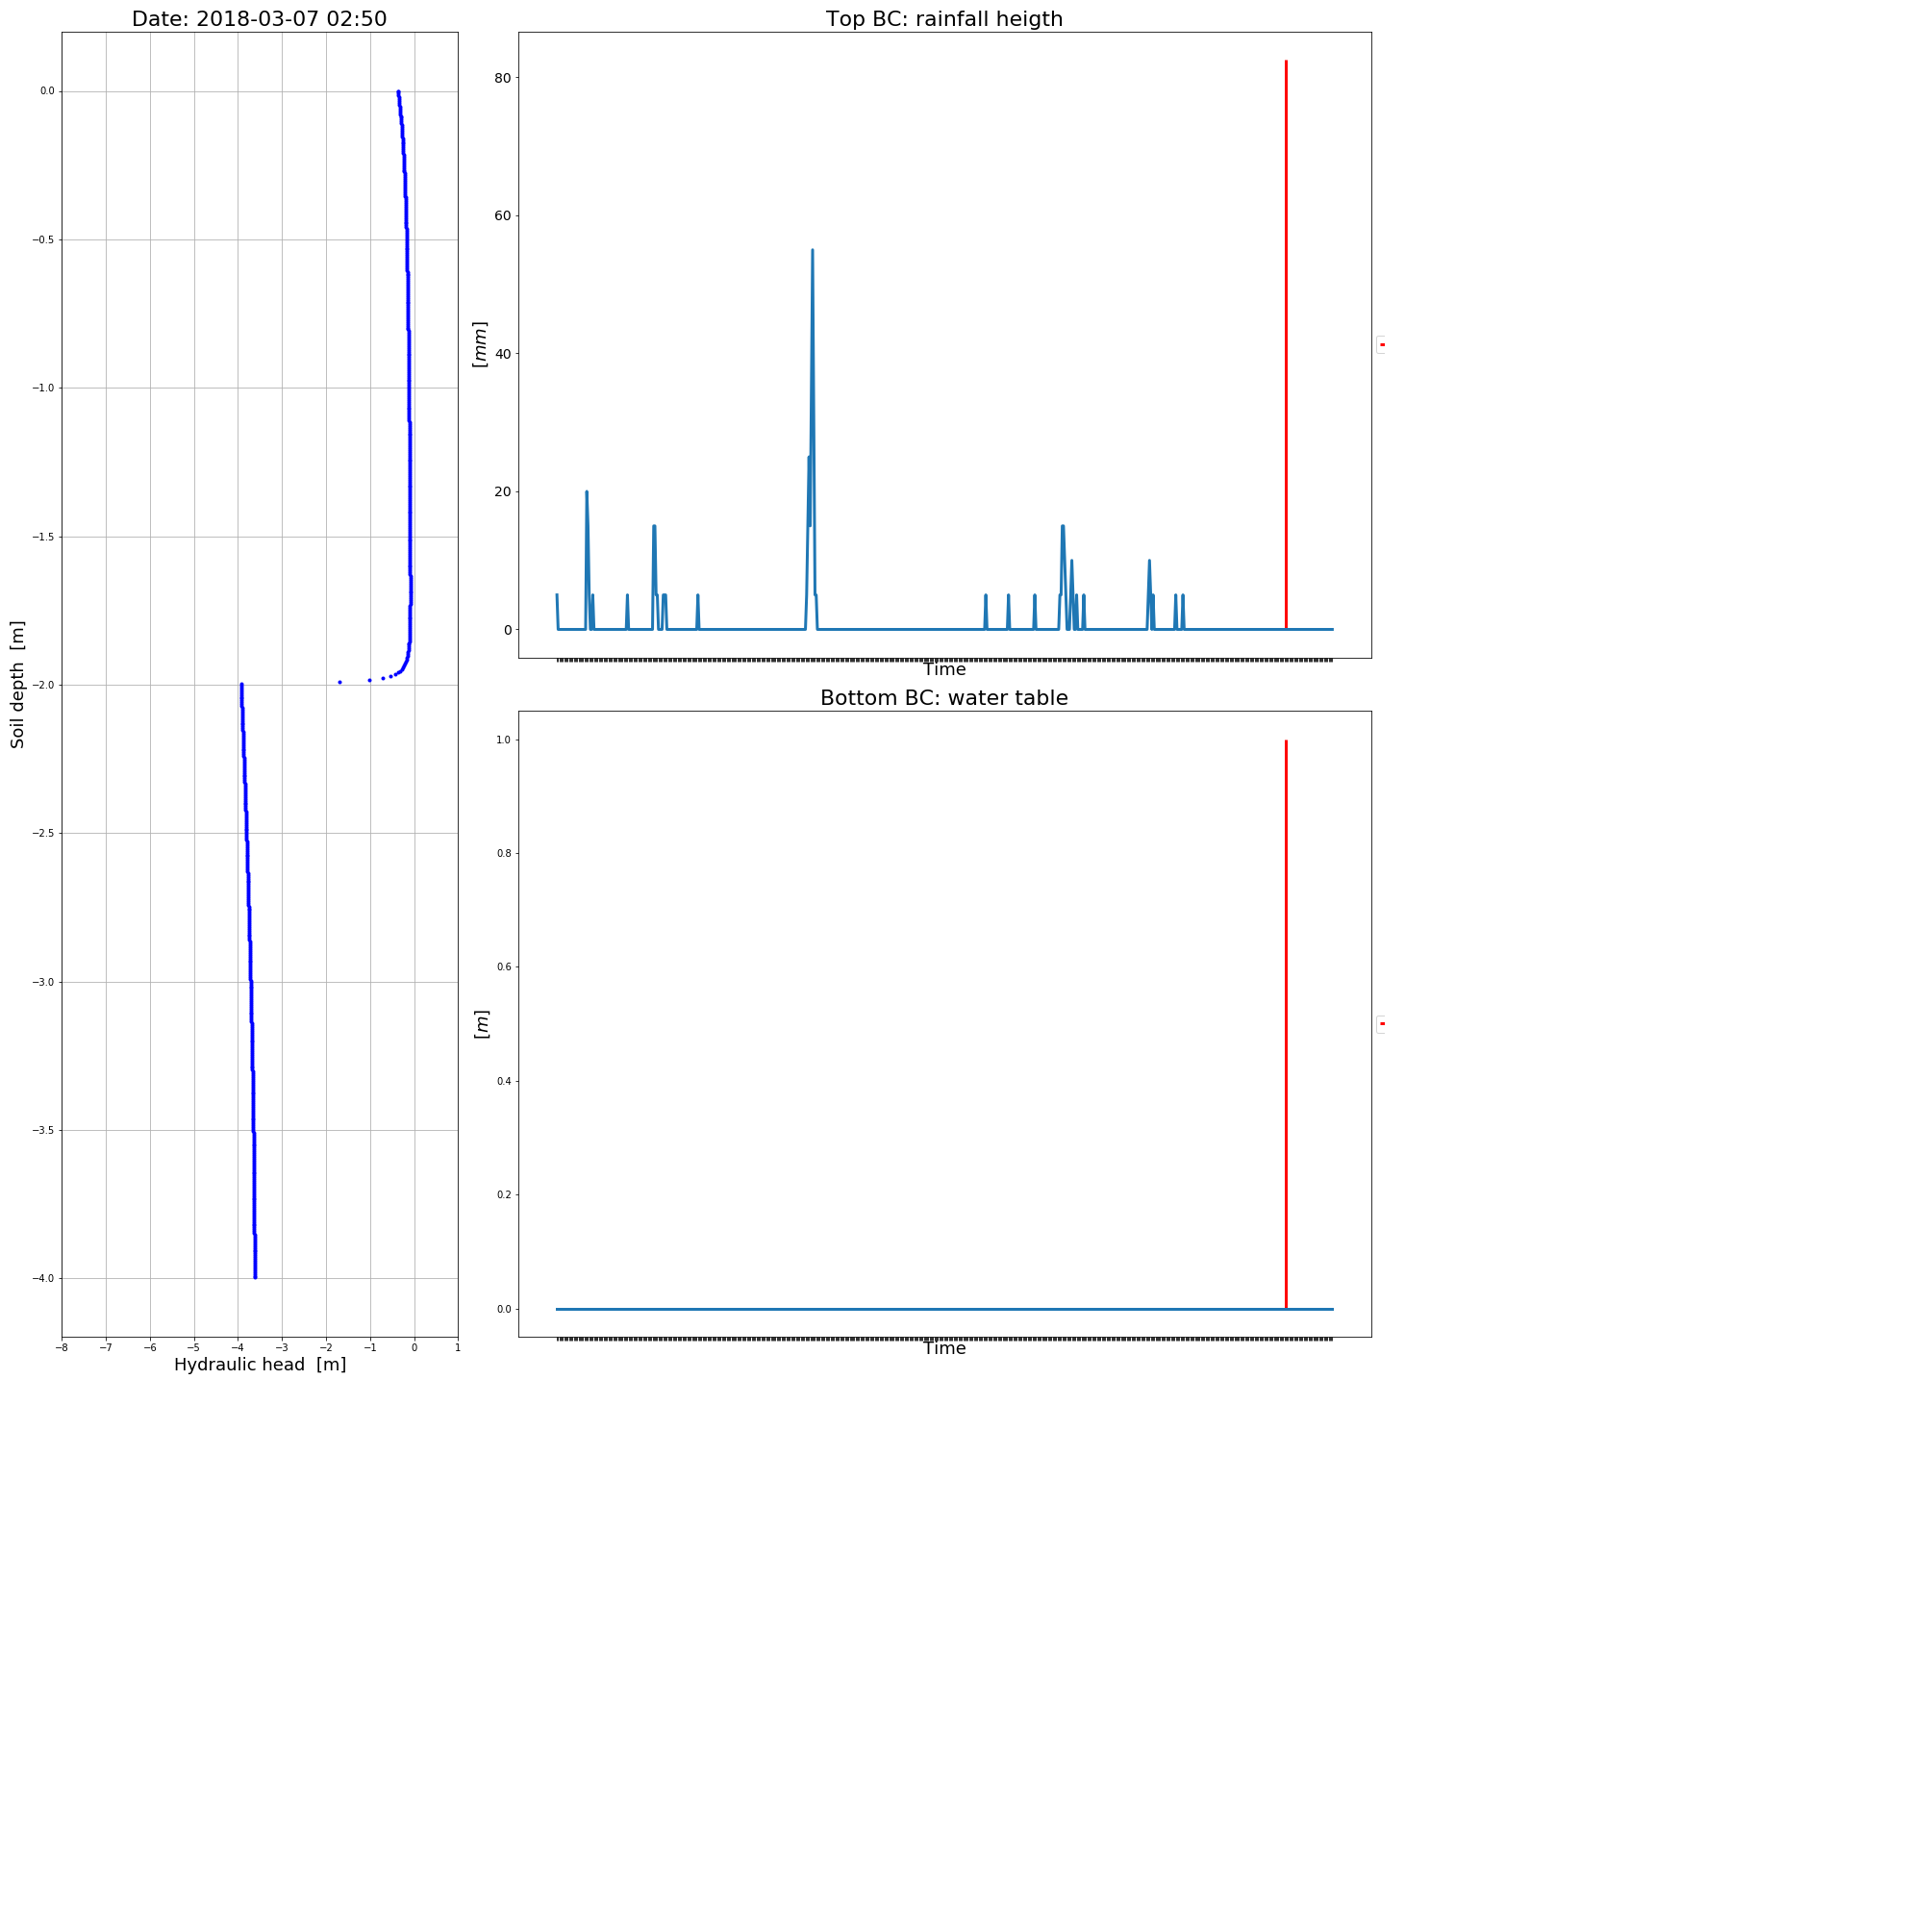

KeyboardInterrupt: 

In [23]:
##https://stackoverflow.com/questions/39658717/plot-dynamically-changing-graph-using-matplotlib-in-jupyter-notebook
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(figureSizeWidth*2,figureSizeHeigth*2))

ax = plt.subplot2grid((4, 6), (0, 0), rowspan=4, colspan=2)
axb = plt.subplot2grid((4, 6), (2,2), rowspan=2, colspan=4)
axt = plt.subplot2grid((4, 6), (0, 2), rowspan=2,colspan=4,sharex=axb)

plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,np.size(time[:])):
    date = datetime.datetime.fromtimestamp(time[i])
    ax.clear()
    ax.plot(psi[i],depths[:], linewidth=lineWidth,linestyle=lineStyle, marker=markerType, markersize=markerSize, color='b')
    ax.set_xlim(-8,1)
    ## convert time value in a human readable date to title the plot
    ax.set_title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
    ## use variable attributes to label axis
    ax.set_xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=labelSize)
    ax.set_ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
    plt.setp(ax.get_xticklabels(), visible=True)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
    ax.grid()
    
    axb.clear()
    axb.plot(bottomBC_DF[0:i+40], linewidth=lineWidth, label='_nolegend_')
    axb.set_xlabel("Time",fontsize=labelSize)
    axb.set_ylabel("[$m$]",fontsize=labelSize)
    axb.set_title('Bottom BC: water table',fontsize=titleSize)
    axb.vlines(x=i, ymin=0, ymax=1, label=date.strftime('%Y-%m-%d %H:%M'), color='r',linewidth=lineWidth,)
    plt.legend()
    axb.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.setp(axb.get_xticklabels(), visible=False)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
    
    axt.clear()
    axt = plt.subplot2grid((4, 6), (0, 2), rowspan=2,colspan=4,sharex=axb)
    axt.plot(topBC_DF[0:i+40],linewidth=lineWidth,)
    axt.set_xlabel("Time",fontsize=labelSize)
    axt.set_ylabel("[$mm$]",fontsize=labelSize)
    axt.set_title('Top BC: rainfall heigth',fontsize=titleSize)
    axt.vlines(x=i, ymin=np.min(topBC[:])*(0.5), ymax=(1.5), label=date.strftime('%Y-%m-%d %H:%M'), color='r',linewidth=lineWidth,)
    plt.legend()
    axt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.setp(axt.get_xticklabels(), visible=False)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
    
    plt.tight_layout() 
    
    
    
    fig.canvas.draw()

## Water content and water table

<IPython.core.display.Javascript object>


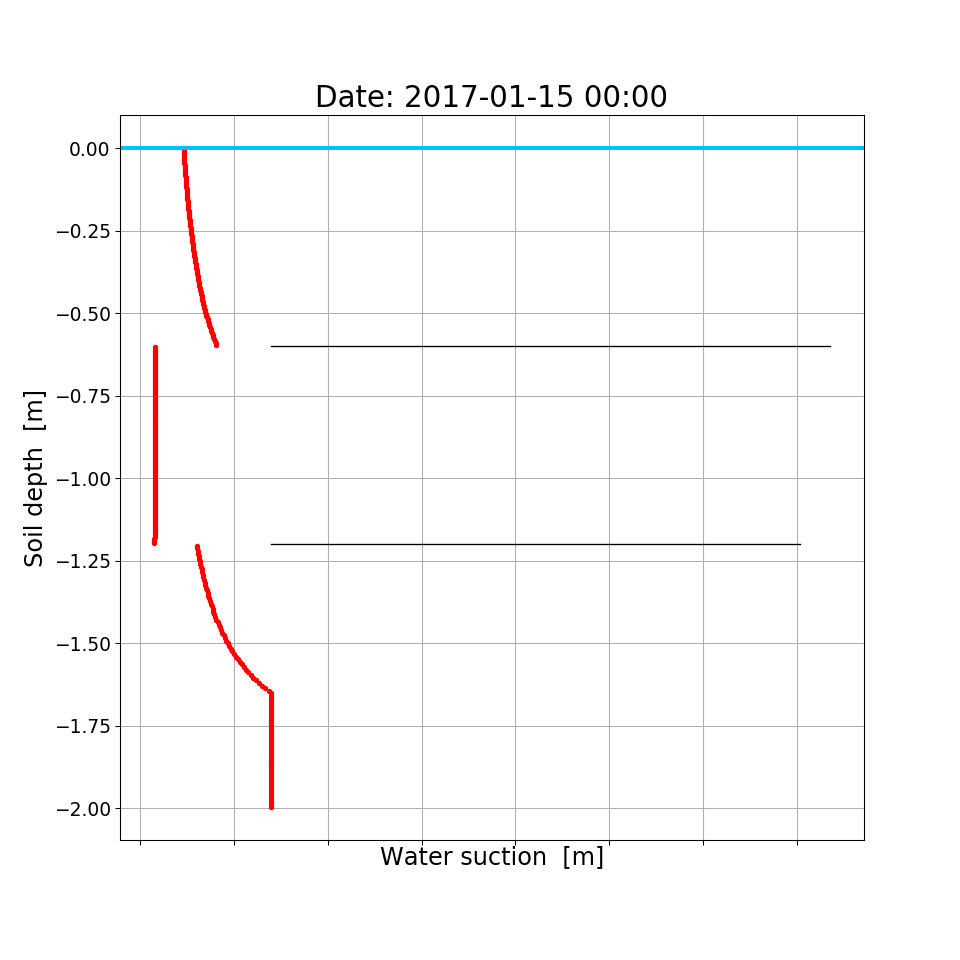

In [ ]:
##https://stackoverflow.com/questions/39658717/plot-dynamically-changing-graph-using-matplotlib-in-jupyter-notebook
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(figureSizeWidth,figureSizeHeigth))
axp = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,np.size(time[:])):
    date = datetime.datetime.fromtimestamp(time[i])
    axp.clear()
    axp.plot(theta[i,0:depths[:].shape[0]-2],depths[0:depths[:].shape[0]-2], linewidth=lineWidth, linestyle=lineStyle, marker=markerType, markersize=markerSize, color='r')
    axp.axhline(y=theta[i,depths[:].shape[0]-1], color='deepskyblue',linewidth=lineWidth, linestyle='-')
    for i in range(1,np.size(data.index)-1):
        if data['Type'][i] == 'L':
            c = 'black'
            l = 'layer'
            axp.plot([np.min(theta[i,0:np.size(theta[i,])-1])-0.001,np.max(theta[i,])+0.001], [data['eta'][i],data['eta'][i]], color=c,linewidth=lineWidth-2)

    # convert time value in a human readable date to title the plot
    axp.set_title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
    # use variable attributes to label axis
    axp.set_xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=labelSize)
    axp.set_ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
    plt.setp(axp.get_xticklabels(), visible=False)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
    axp.grid()
    
    fig.canvas.draw()

<IPython.core.display.Javascript object>


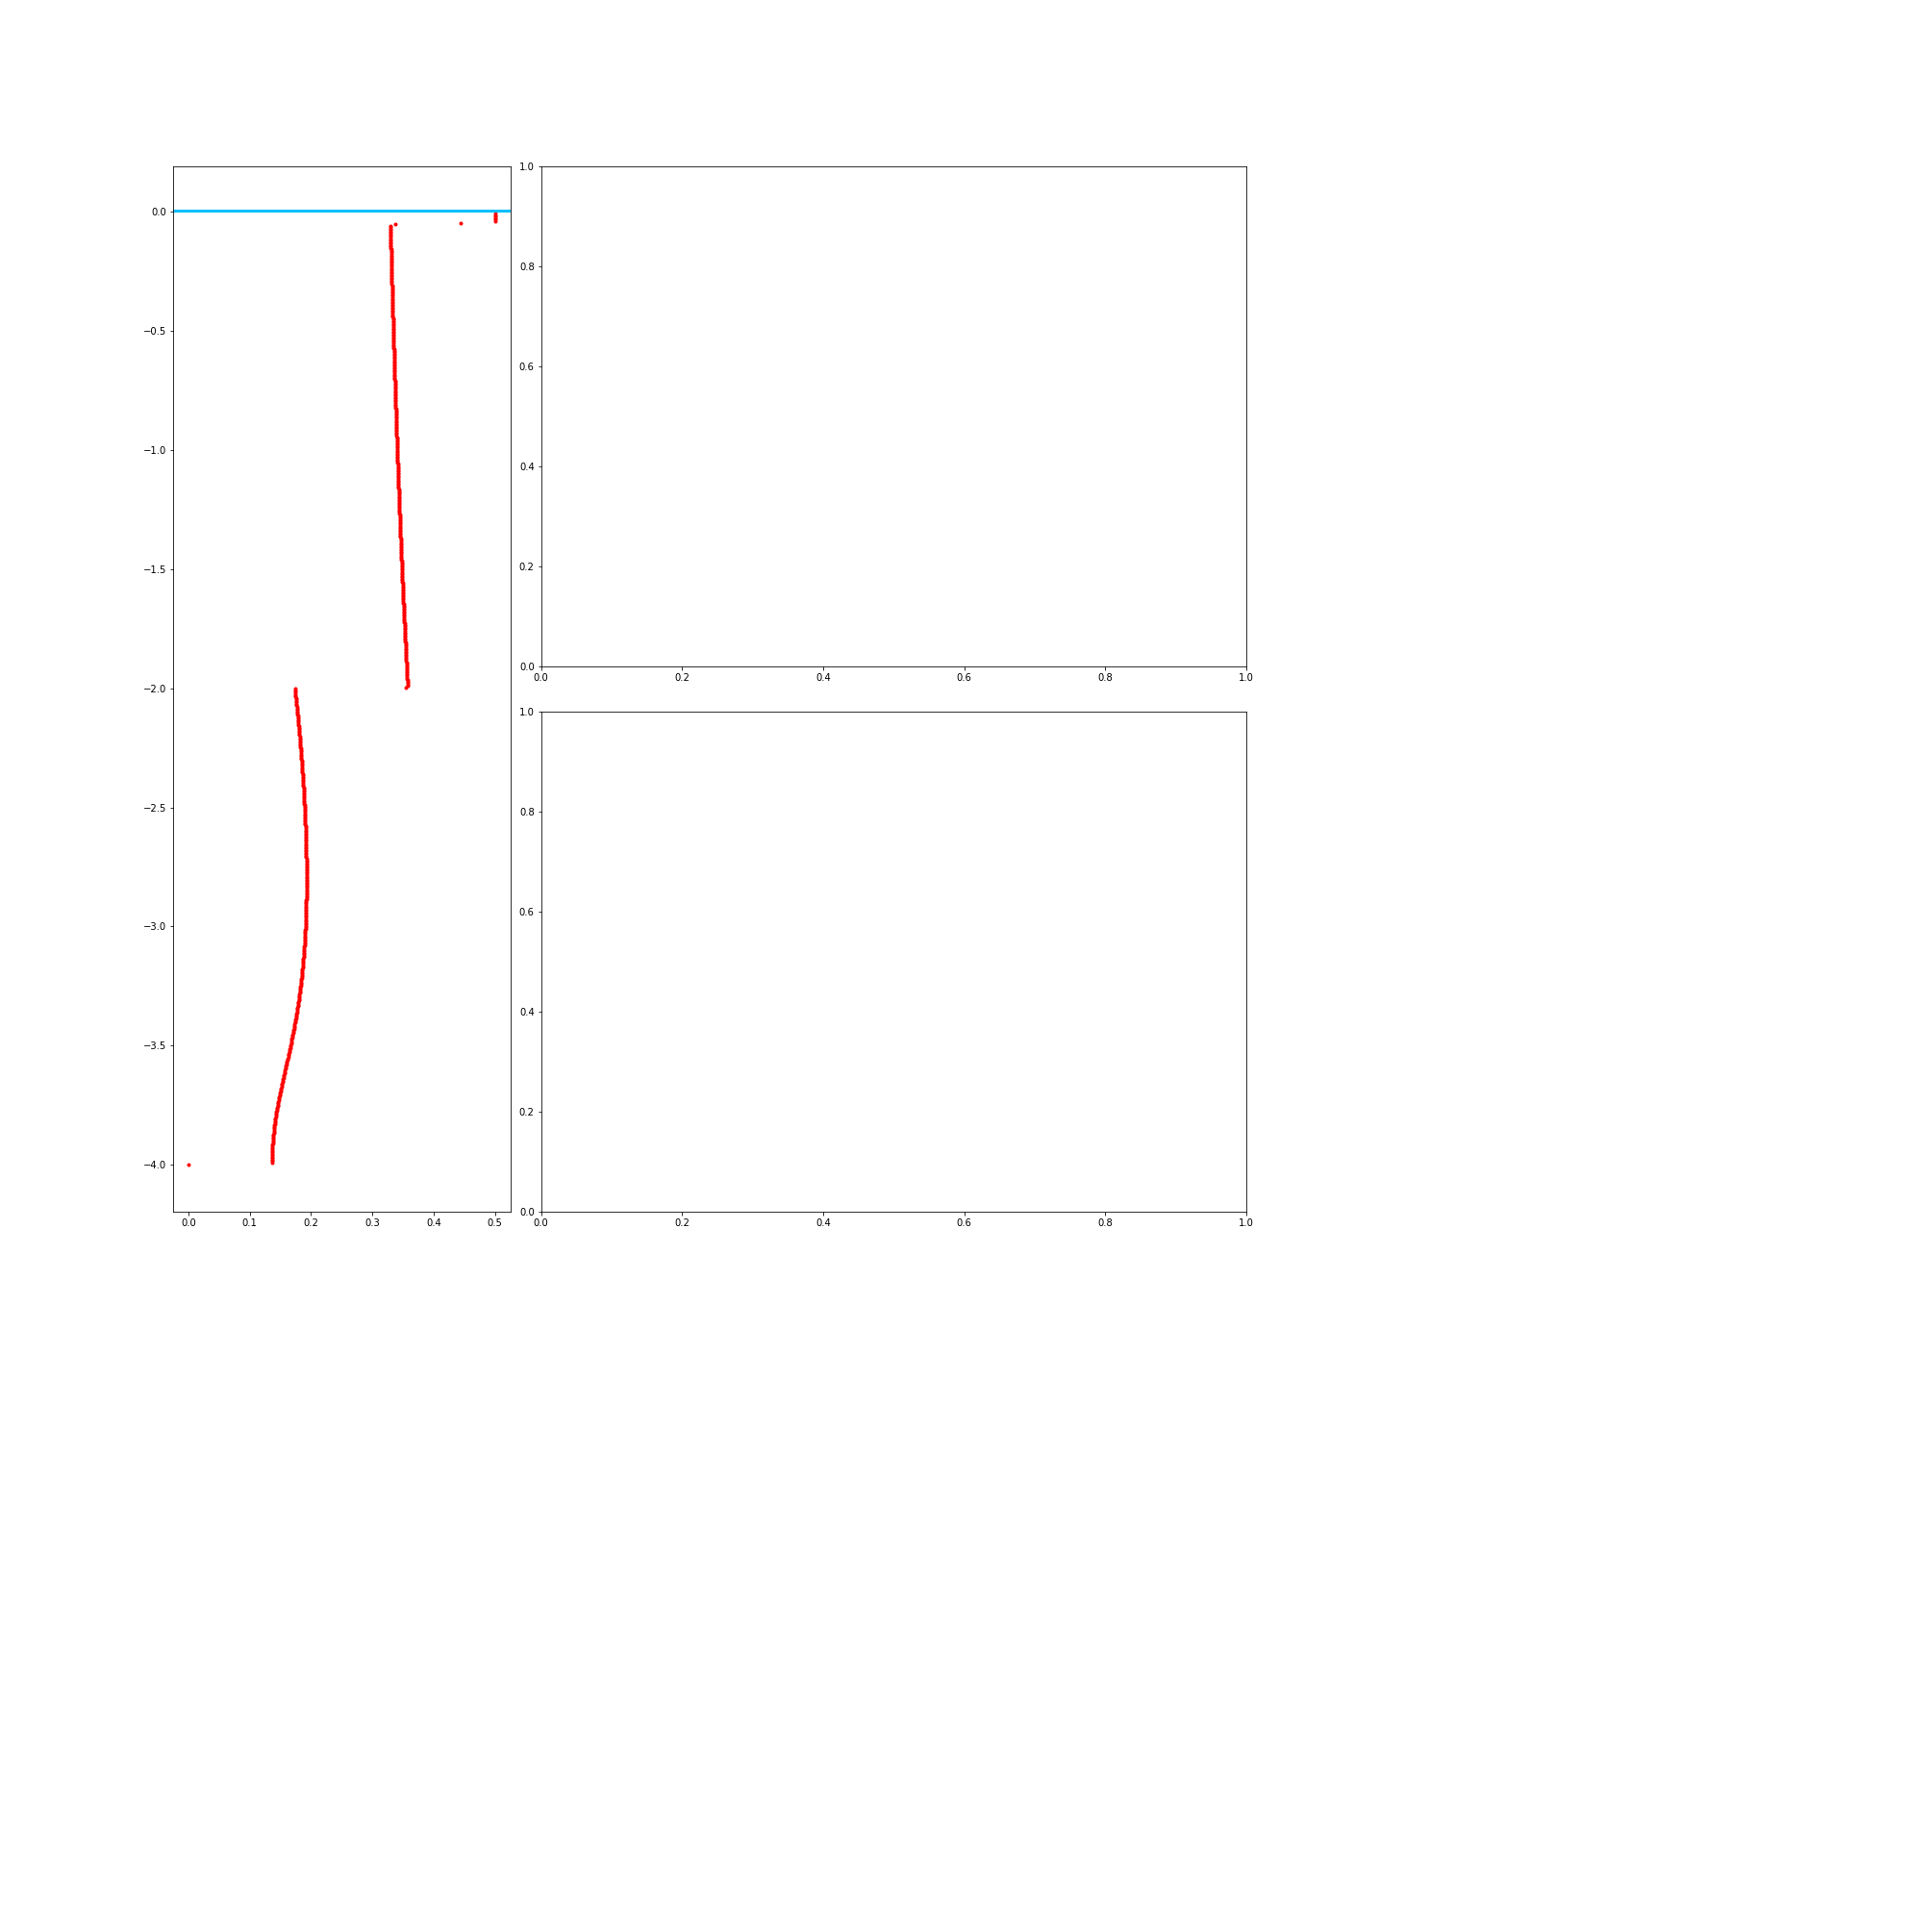

NameError: name 'data' is not defined

In [24]:
##https://stackoverflow.com/questions/39658717/plot-dynamically-changing-graph-using-matplotlib-in-jupyter-notebook

fig = plt.figure(figsize=(figureSizeWidth*2,figureSizeHeigth*2))

axp = plt.subplot2grid((4, 6), (0, 0), rowspan=4, colspan=2)
axb = plt.subplot2grid((4, 6), (2,2), rowspan=2, colspan=4)
axt = plt.subplot2grid((4, 6), (0, 2), rowspan=2,colspan=4,sharex=axb)

plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,np.size(time[:])):
    date = datetime.datetime.fromtimestamp(time[i])
    waterLevel=theta[i,depths[:].shape[0]-1]
    
    axp.clear()
    axp.plot(theta[i,0:depths[:].shape[0]-2],depths[0:depths[:].shape[0]-2], linewidth=lineWidth, linestyle=lineStyle, marker=markerType, markersize=markerSize, color='r')
    axp.axhline(y=theta[i,depths[:].shape[0]-1], color='deepskyblue',linewidth=lineWidth, linestyle='-')
    for i in range(1,np.size(data.index)-1):
        if data['Type'][i] == 'L':
            c = 'black'
            l = 'layer'
            axp.plot([np.min(theta[i,0:np.size(theta[i,])-1])-0.001,np.max(theta[i,])+0.001], [data['eta'][i],data['eta'][i]], color=c,linewidth=lineWidth-2)

    plt.legend(['$\\theta$', 'Total water depth','layer'], fontsize=legendSize,loc=3)
    axp.set_title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
    plt.xlabel('$\\theta$ [$-$]',fontsize=labelSize )
    plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
    plt.xticks(fontsize=axisTicksSize)
    plt.yticks(fontsize=axisTicksSize)

    # https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
    trans = transforms.blended_transform_factory(
        axp.get_yticklabels()[0].get_transform(), axp.transData)
    axp.text(-0.08,waterLevel, "{:.2f}".format(waterLevel), color="deepskyblue", transform=trans, 
        ha="right", va="center",fontsize=axisTicksSize)

    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
    axp.grid()

    axb.clear()
    axb.plot(bottomBC_DF[0:i+40],linewidth=lineWidth, label='_nolegend_')
    axb.set_xlabel("Time",fontsize=labelSize)
    axb.set_ylabel("[$m$]",fontsize=labelSize)
    axb.set_title('Bottom BC: water table',fontsize=titleSize)
    axb.vlines(x=i, ymin=0, ymax=1, label=date.strftime('%Y-%m-%d %H:%M'), color='r',linewidth=lineWidth)
    plt.legend()
    axb.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.setp(axb.get_xticklabels(), visible=False)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

    
    axt.clear()
    axt.plot(topBC_DF[0:i+40],linewidth=lineWidth,)
    axt.set_xlabel("Time",fontsize=labelSize)
    axt.set_ylabel("[$mm$]",fontsize=labelSize)
    axt.set_title('Top BC: rainfall heigth',fontsize=titleSize)
    axt.vlines(x=i, ymin=np.min(topBC[:])*(0.5), ymax=(1.5), label=date.strftime('%Y-%m-%d %H:%M'), color='r',linewidth=lineWidth,)
    plt.legend()
    axt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.setp(axt.get_xticklabels(), visible=False)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
    
    plt.tight_layout() 
    
    
    
    fig.canvas.draw()

In [9]:
ncfile.close()